In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

Importing train dataset:

In [92]:
train = pd.read_csv('train.csv')
train.rename(columns={'Sales(In ThousandDollars)':'Sales'}, inplace=True)
train.head()

Year  Month ProductCategory   Sales
0  2009      1   WomenClothing  1755.0
1  2009      1     MenClothing   524.0
2  2009      1   OtherClothing   936.0
3  2009      2   WomenClothing  1729.0
4  2009      2     MenClothing   496.0

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
Year               216 non-null int64
Month              216 non-null int64
ProductCategory    216 non-null object
Sales              204 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.8+ KB


There are 12 null values in *Sales* column. *Sales* is our target variable so we cannot use rows where this is not available in our model.

In [94]:
train.dropna(subset=['Sales'], inplace=True)

In [95]:
test = pd.read_csv('test.csv')
test.drop('Sales(In ThousandDollars)',axis=1,inplace=True)
test.head()

Year  Month ProductCategory
0  2015      1   WomenClothing
1  2015      1     MenClothing
2  2015      1   OtherClothing
3  2015      2   WomenClothing
4  2015      2     MenClothing

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
Year               36 non-null int64
Month              36 non-null int64
ProductCategory    36 non-null object
dtypes: int64(2), object(1)
memory usage: 944.0+ bytes


In [97]:
econ = pd.read_excel('macro_economic.xlsx', na_values='?')
econ.head()

Year-Month  Monthly Nominal GDP Index (inMillion$)  \
0  2009 - Jan                            14421.752895   
1  2009 - Feb                            14389.200466   
2  2009 - Mar                            14340.701639   
3  2009 - Apr                            14326.815525   
4  2009 - May                            14345.904809   

   Monthly Real GDP Index (inMillion$)      CPI PartyInPower  \
0                         14407.053343  233.402    Democrats   
1                         14366.176571  234.663    Democrats   
2                         14351.786822  235.067    Democrats   
3                         14351.601731  235.582    Democrats   
4                         14368.123959  235.975    Democrats   

   unemployment rate  CommercialBankInterestRateonCreditCardPlans  \
0                7.8                                        12.03   
1                8.3                                        12.97   
2                8.7                                        12.97   
3                9.0                                        12.97   
4                9.4                                        13.32   

   Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan  \
0                                              11.44                   
1                                              11.05                   
2                                              11.05                   
3                                              11.05                   
4                                              11.25                   

   Earnings or wages  in dollars per hour  \
0                                   22.05   
1                                   22.22   
2                                   22.22   
3                                   22.13   
4                                   22.04   

   AdvertisingExpenses (in Thousand Dollars)  \
0                                      137.0   
1                                      200.0   
2                                        NaN   
3                                      214.0   
4                                        NaN   

   Cotton Monthly Price - US cents per Pound(lbs)  Change(in%)  \
0                                           57.70         4.02   
1                                           55.21        -4.32   
2                                           51.50        -6.72   
3                                           56.78        10.25   
4                                           61.95         9.11   

   Average upland planted(million acres)  \
0                                  9.296   
1                                  9.296   
2                                  9.296   
3                                  9.296   
4                                  9.297   

   Average upland harvested(million acres)  yieldperharvested acre  \
0                                    7.559                     799   
1                                    7.559                     799   
2                                    7.559                     799   
3                                    7.559                     787   
4                                    7.400                     803   

   Production (in  480-lb netweright in million bales)  \
0                                             12.589     
1                                             12.589     
2                                             12.589     
3                                             12.400     
4                                             12.384     

   Mill use  (in  480-lb netweright in million bales)  Exports  
0                                               4.17    11.550  
1                                               3.87    11.100  
2                                               3.72    11.650  
3                                               3.62    12.225  
4                                               3.52    12.300

In [98]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
Year-Month                                                           96 non-null object
Monthly Nominal GDP Index (inMillion$)                               96 non-null float64
Monthly Real GDP Index (inMillion$)                                  96 non-null float64
CPI                                                                  96 non-null float64
PartyInPower                                                         96 non-null object
unemployment rate                                                    96 non-null float64
CommercialBankInterestRateonCreditCardPlans                          96 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    96 non-null float64
Earnings or wages  in dollars per hour                               96 non-null float64
AdvertisingExpenses (in Thousand Dollars)                            11 non-null float64
Cotton Mo

The columns in **train/test** are two separate columns: *Year* and *Month*.  
In **macro_economic** file it is only a single column: *Year/Month*.  
To be able to merge these two dataframes we must split Year/Month into Year and Month columns and Month columns should be converted from *Jan/Feb/.../Dec* to *1/2/.../12*

In [99]:
econ['Year'] = econ['Year-Month'].str[:4].astype(int)
econ['Month'] = econ['Year-Month'].str[-3:].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
                                                    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
                                                    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
econ.drop('Year-Month',axis=1,inplace=True)
econ.head()

Monthly Nominal GDP Index (inMillion$)  \
0                            14421.752895   
1                            14389.200466   
2                            14340.701639   
3                            14326.815525   
4                            14345.904809   

   Monthly Real GDP Index (inMillion$)      CPI PartyInPower  \
0                         14407.053343  233.402    Democrats   
1                         14366.176571  234.663    Democrats   
2                         14351.786822  235.067    Democrats   
3                         14351.601731  235.582    Democrats   
4                         14368.123959  235.975    Democrats   

   unemployment rate  CommercialBankInterestRateonCreditCardPlans  \
0                7.8                                        12.03   
1                8.3                                        12.97   
2                8.7                                        12.97   
3                9.0                                        12.97   
4                9.4                                        13.32   

   Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan  \
0                                              11.44                   
1                                              11.05                   
2                                              11.05                   
3                                              11.05                   
4                                              11.25                   

   Earnings or wages  in dollars per hour  \
0                                   22.05   
1                                   22.22   
2                                   22.22   
3                                   22.13   
4                                   22.04   

   AdvertisingExpenses (in Thousand Dollars)  \
0                                      137.0   
1                                      200.0   
2                                        NaN   
3                                      214.0   
4                                        NaN   

   Cotton Monthly Price - US cents per Pound(lbs)  Change(in%)  \
0                                           57.70         4.02   
1                                           55.21        -4.32   
2                                           51.50        -6.72   
3                                           56.78        10.25   
4                                           61.95         9.11   

   Average upland planted(million acres)  \
0                                  9.296   
1                                  9.296   
2                                  9.296   
3                                  9.296   
4                                  9.297   

   Average upland harvested(million acres)  yieldperharvested acre  \
0                                    7.559                     799   
1                                    7.559                     799   
2                                    7.559                     799   
3                                    7.559                     787   
4                                    7.400                     803   

   Production (in  480-lb netweright in million bales)  \
0                                             12.589     
1                                             12.589     
2                                             12.589     
3                                             12.400     
4                                             12.384     

   Mill use  (in  480-lb netweright in million bales)  Exports  Year  Month  
0                                               4.17    11.550  2009      1  
1                                               3.87    11.100  2009      2  
2                                               3.72    11.650  2009      3  
3                                               3.62    12.225  2009      4  
4                                               3.52    12.300  2009      5

Now we can merge econ and train based on *Year* and *Month* columns

In [100]:
econ_train = train.merge(econ, on=['Year','Month'], how='inner')
econ_test = test.merge(econ, on=['Year','Month'], how='inner')
econ_train.head()

Year  Month ProductCategory   Sales  \
0  2009      1   WomenClothing  1755.0   
1  2009      1     MenClothing   524.0   
2  2009      1   OtherClothing   936.0   
3  2009      2   WomenClothing  1729.0   
4  2009      2     MenClothing   496.0   

   Monthly Nominal GDP Index (inMillion$)  \
0                            14421.752895   
1                            14421.752895   
2                            14421.752895   
3                            14389.200466   
4                            14389.200466   

   Monthly Real GDP Index (inMillion$)      CPI PartyInPower  \
0                         14407.053343  233.402    Democrats   
1                         14407.053343  233.402    Democrats   
2                         14407.053343  233.402    Democrats   
3                         14366.176571  234.663    Democrats   
4                         14366.176571  234.663    Democrats   

   unemployment rate  CommercialBankInterestRateonCreditCardPlans  ...  \
0                7.8                                        12.03  ...   
1                7.8                                        12.03  ...   
2                7.8                                        12.03  ...   
3                8.3                                        12.97  ...   
4                8.3                                        12.97  ...   

   Earnings or wages  in dollars per hour  \
0                                   22.05   
1                                   22.05   
2                                   22.05   
3                                   22.22   
4                                   22.22   

   AdvertisingExpenses (in Thousand Dollars)  \
0                                      137.0   
1                                      137.0   
2                                      137.0   
3                                      200.0   
4                                      200.0   

   Cotton Monthly Price - US cents per Pound(lbs)  Change(in%)  \
0                                           57.70         4.02   
1                                           57.70         4.02   
2                                           57.70         4.02   
3                                           55.21        -4.32   
4                                           55.21        -4.32   

   Average upland planted(million acres)  \
0                                  9.296   
1                                  9.296   
2                                  9.296   
3                                  9.296   
4                                  9.296   

   Average upland harvested(million acres)  yieldperharvested acre  \
0                                    7.559                     799   
1                                    7.559                     799   
2                                    7.559                     799   
3                                    7.559                     799   
4                                    7.559                     799   

   Production (in  480-lb netweright in million bales)  \
0                                             12.589     
1                                             12.589     
2                                             12.589     
3                                             12.589     
4                                             12.589     

   Mill use  (in  480-lb netweright in million bales)  Exports  
0                                               4.17     11.55  
1                                               4.17     11.55  
2                                               4.17     11.55  
3                                               3.87     11.10  
4                                               3.87     11.10  

[5 rows x 21 columns]

In [11]:
econ_train.profile_report()

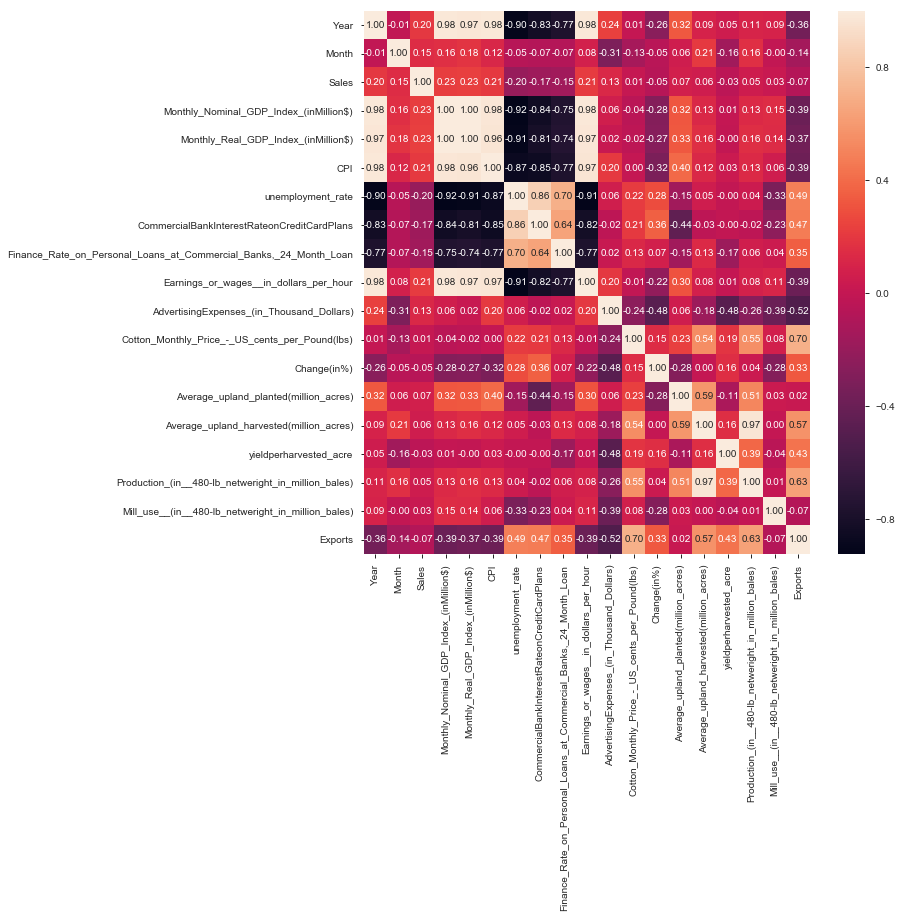

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(econ_train.corr(),annot=True,fmt='.2f')
plt.show()

Based on profiling, dropping the following 7 columns:

- AdvertisingExpenses_(in_Thousand_Dollars) has 179 (87.7%) missing values
- Earnings_or_wages__in_dollars_per_hour is highly correlated with CPI (ρ = 0.9656124007)
- Monthly_Nominal_GDP_Index_(inMillion) is highly correlated with Earnings_or_wages__in_dollars_per_hour (ρ = 0.9808819814)
- Monthly_Real_GDP_Index_(inMillion) is highly correlated with Monthly_Nominal_GDP_Index_(inMillion) (ρ = 0.9968703079)
- PartyInPower has constant value "Democrats"
- Production_(in__480-lb_netweright_in_million_bales) is highly correlated with Average_upland_harvested(million_acres) (ρ = 0.9671361139)
- Year is highly correlated with Monthly_Real_GDP_Index_(inMillion)

In [27]:
econ_train.columns

Index(['Year', 'Month', 'ProductCategory', 'Sales',
       'Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'PartyInPower',
       'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'AdvertisingExpenses (in Thousand Dollars)',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports'],
      dtype='object')

In [101]:
cols_to_drop = ['AdvertisingExpenses (in Thousand Dollars)','Earnings or wages  in dollars per hour',
               'Monthly Nominal GDP Index (inMillion$)','Monthly Real GDP Index (inMillion$)','PartyInPower',
               'Production (in  480-lb netweright in million bales)','Year']
econ_train.drop(cols_to_drop,axis=1,inplace=True)
econ_test.drop(cols_to_drop,axis=1,inplace=True)

In [102]:
x = econ_train.drop('Sales',axis=1)
y = econ_train['Sales']

In [103]:
cat_cols = ['Month','ProductCategory']
x[cat_cols] = x[cat_cols].astype('category')

In [104]:
num_cols = x.select_dtypes(exclude='category').columns

One Hot Encoding for Categorical Columns:

In [105]:
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)
econ_test = pd.get_dummies(econ_test, columns=cat_cols, drop_first=True)
x.head()

CPI  unemployment rate  CommercialBankInterestRateonCreditCardPlans  \
0  233.402                7.8                                        12.03   
1  233.402                7.8                                        12.03   
2  233.402                7.8                                        12.03   
3  234.663                8.3                                        12.97   
4  234.663                8.3                                        12.97   

   Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan  \
0                                              11.44                   
1                                              11.44                   
2                                              11.44                   
3                                              11.05                   
4                                              11.05                   

   Cotton Monthly Price - US cents per Pound(lbs)  Change(in%)  \
0                                           57.70         4.02   
1                                           57.70         4.02   
2                                           57.70         4.02   
3                                           55.21        -4.32   
4                                           55.21        -4.32   

   Average upland planted(million acres)  \
0                                  9.296   
1                                  9.296   
2                                  9.296   
3                                  9.296   
4                                  9.296   

   Average upland harvested(million acres)  yieldperharvested acre  \
0                                    7.559                     799   
1                                    7.559                     799   
2                                    7.559                     799   
3                                    7.559                     799   
4                                    7.559                     799   

   Mill use  (in  480-lb netweright in million bales)  ...  Month_5  Month_6  \
0                                               4.17   ...        0        0   
1                                               4.17   ...        0        0   
2                                               4.17   ...        0        0   
3                                               3.87   ...        0        0   
4                                               3.87   ...        0        0   

   Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  \
0        0        0        0         0         0         0   
1        0        0        0         0         0         0   
2        0        0        0         0         0         0   
3        0        0        0         0         0         0   
4        0        0        0         0         0         0   

   ProductCategory_OtherClothing  ProductCategory_WomenClothing  
0                              0                              1  
1                              0                              0  
2                              1                              0  
3                              0                              1  
4                              0                              0  

[5 rows x 24 columns]

Train Test Split

In [106]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

Scaling all the numerical columns

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain.loc[:,num_cols] = sc.fit_transform(xtrain[num_cols])
xtrain.head()

CPI  unemployment rate  CommercialBankInterestRateonCreditCardPlans  \
122  0.494080          -0.088106                                    -0.831777   
83  -0.137923           0.629089                                     0.363975   
19  -1.363886           1.027530                                     0.910968   
154  0.945227          -0.725612                                    -0.831777   
107  0.308541          -0.008418                                    -0.335667   

     Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan  \
122                                          -0.713068                   
83                                            1.561828                   
19                                            1.288841                   
154                                          -0.781315                   
107                                           0.469878                   

     Cotton Monthly Price - US cents per Pound(lbs)  Change(in%)  \
122                                       -0.345377    -0.026088   
83                                         1.982093    -3.104598   
19                                        -0.907735     0.617717   
154                                       -0.109532    -0.153827   
107                                        0.087867    -0.249631   

     Average upland planted(million acres)  \
122                               0.760296   
83                               -0.171648   
19                               -1.236726   
154                              -0.596765   
107                               1.917940   

     Average upland harvested(million acres)  yieldperharvested acre  \
122                                 1.421765               -0.944364   
83                                  1.354379                0.364301   
19                                 -0.956967                0.017890   
154                                -1.103531                0.749203   
107                                 0.467408               -1.598697   

     Mill use  (in  480-lb netweright in million bales)  ...  Month_5  \
122                                          -0.953502   ...        0   
83                                            1.245990   ...        1   
19                                           -0.410770   ...        0   
154                                          -0.382206   ...        0   
107                                          -0.953502   ...        0   

     Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  \
122        0        0        1        0         0         0         0   
83         0        0        0        0         0         0         0   
19         0        1        0        0         0         0         0   
154        0        1        0        0         0         0         0   
107        0        0        0        0         0         0         0   

     ProductCategory_OtherClothing  ProductCategory_WomenClothing  
122                              0                              1  
83                               1                              0  
19                               0                              0  
154                              0                              0  
107                              0                              1  

[5 rows x 24 columns]

In [108]:
sc1 = StandardScaler()
x.loc[:,num_cols] = sc1.fit_transform(x[num_cols])
econ_test.loc[:,num_cols] = sc1.transform(econ_test[num_cols])

## Linear Regression

In [109]:
import statsmodels.api as sm
xtrain_sm = sm.add_constant(xtrain)
ols = sm.OLS(ytrain,xtrain_sm).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     66.52
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           5.94e-57
Time:                        14:57:14   Log-Likelihood:                -1025.6
No. Observations:                 142   AIC:                             2101.
Df Residuals:                     117   BIC:                             2175.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                               295.9132    117.080      2.527      0.013      64.041     527.785
CPI                                                                 348.6435    163.755      2.129      0.035      24.335     672.952
unemployment rate                                                  -117.4340    162.210     -0.724      0.471    -438.682     203.814
CommercialBankInterestRateonCreditCardPlans                         134.8895     94.677      1.425      0.157     -52.614     322.393
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    86.0932     64.026      1.345      0.181     -40.706     212.892
Cotton Monthly Price - US cents per Pound(lbs)                      -35.9286     75.525     -0.476      0.635    -185.502     113.645
Change(in%)                                                          43.2558     46.010      0.940      0.349     -47.865     134.376
Average upland planted(million acres)                                25.1760     74.552      0.338      0.736    -122.471     172.823
Average upland harvested(million acres)                             -15.2422     78.854     -0.193      0.847    -171.409     140.924
yieldperharvested acre                                                1.7311     42.259      0.041      0.967     -81.962      85.424
Mill use  (in  480-lb netweright in million bales)                   13.1573     65.986      0.199      0.842    -117.525     143.840
Exports                                                               9.8463     81.261      0.121      0.904    -151.087     170.779
Month_2                                                             -32.9401    147.863     -0.223      0.824    -325.775     259.895
Month_3                                                             339.9922    165.119      2.059      0.042      12.983     667.002
Month_4                                                             428.4514    160.323      2.672      0.009     110.940     745.963
Month_5                                                             459.2444    160.113      2.868      0.005     142.148     776.340
Month_6                                                             253.2375    159.771      1.585      0.116     -63.181     569.656
Month_7                                                             200.2441    163.767      1.223      0.224    -124.088     524.577
Month_8                                                             227.1709    178.394      1.273      0.205    -126.129     580.470
Month_9                                                             336.7443    190.245      1.770      0.079     -40.026     713.514
M

In [110]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
train_pred = lm.predict(xtrain)
print('Training RMSE =', np.sqrt(mean_squared_error(ytrain,train_pred)))

test_pred = lm.predict(xtest)
print('Test RMSE =', np.sqrt(mean_squared_error(ytest,test_pred)))

Training RMSE = 331.49328783574293
Test RMSE = 86620.1155911088


In [112]:
test_pred = lm.predict(econ_test)
submitdf = pd.DataFrame({'S.No.':np.arange(1,37), 'Sales':test_pred})
submitdf.to_csv('submission-lr1.csv',index=False)

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=40, max_features='auto',max_depth=6,max_leaf_nodes=30)
rf.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [114]:
train_pred = rf.predict(xtrain)
print('Training RMSE =', np.sqrt(mean_squared_error(ytrain,train_pred)))

test_pred = rf.predict(xtest)
print('Test RMSE =', np.sqrt(mean_squared_error(ytest,test_pred)))

Training RMSE = 129.52564454875807
Test RMSE = 353.31466391744


In [115]:
rf.fit(x,y)
test_pred = rf.predict(econ_test)
submitdf = pd.DataFrame({'S.No.':np.arange(1,37), 'Sales':test_pred})
submitdf.to_csv('submission-rf5.csv',index=False)

## Extra Trees

In [116]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(xtrain,ytrain)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [117]:
train_pred = et.predict(xtrain)
print('Training RMSE =', np.sqrt(mean_squared_error(ytrain,train_pred)))

test_pred = et.predict(xtest)
print('Test RMSE =', np.sqrt(mean_squared_error(ytest,test_pred)))

Training RMSE = 0.0
Test RMSE = 401.9173438535871


In [118]:
test_pred = et.predict(econ_test)
submitdf = pd.DataFrame({'S.No.':np.arange(1,37), 'Sales':test_pred})
submitdf.to_csv('submission-et1.csv',index=False)

## AdaBoost

In [119]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(learning_rate=0.1,loss='square',n_estimators=100)
ab.fit(xtrain,ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
                  n_estimators=100, random_state=None)

In [120]:
train_pred = ab.predict(xtrain)
print('Training RMSE =', np.sqrt(mean_squared_error(ytrain,train_pred)))

test_pred = ab.predict(xtest)
print('Test RMSE =', np.sqrt(mean_squared_error(ytest,test_pred)))

Training RMSE = 203.91742432345805
Test RMSE = 404.90418875191364


In [121]:
ab.fit(x,y)
test_pred = ab.predict(econ_test)
submitdf = pd.DataFrame({'S.No.':np.arange(1,37), 'Sales':test_pred})
submitdf.to_csv('submission-ab1.csv',index=False)

### Cross Validation

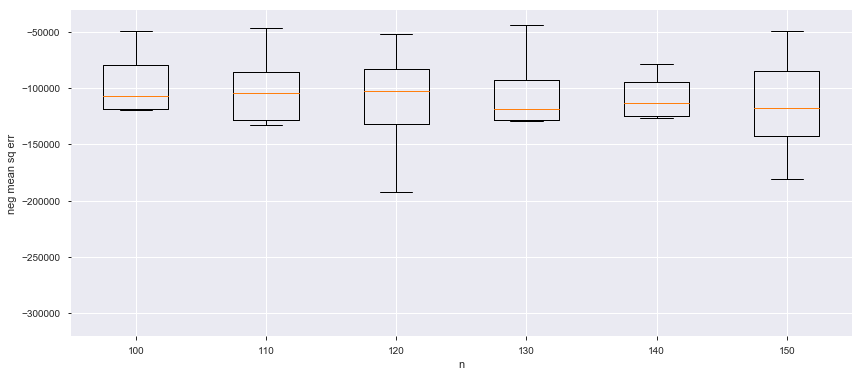

In [76]:
from sklearn.model_selection import cross_val_score
arr=[100,110,120,130,140,150]
cv_scores = []
for a in arr:
    model = AdaBoostRegressor(learning_rate=0.1,loss='square',n_estimators=100)
    cv_scores.append(cross_val_score(model, x, y, cv=10, scoring='neg_mean_squared_error'))
    
fig, ax = plt.subplots(figsize=(14,6))
plt.boxplot(cv_scores)
ax.set_xticklabels(arr)
plt.xlabel('n')
plt.ylabel('neg mean sq err')
plt.show()

## PCA

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(xtrain_2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [146]:
Xtrain_pca = pca.transform(xtrain_2)
Xtrain_pca.shape

(142, 142)

In [147]:
Xtest_pca = pca.transform(xtest_2)
Xtest_pca.shape

(62, 142)

In [148]:
np.cumsum(pca.explained_variance_ratio_)

array([0.20034251, 0.29922851, 0.39635218, 0.47976197, 0.55148996,
       0.60547858, 0.65149844, 0.69128583, 0.72344163, 0.74266642,
       0.75996127, 0.7756936 , 0.78928612, 0.80133103, 0.81270859,
       0.82307623, 0.83306648, 0.84178022, 0.84997689, 0.85716127,
       0.86417636, 0.87095131, 0.87750196, 0.88346959, 0.88922358,
       0.89459708, 0.89954971, 0.90410833, 0.90858099, 0.91291992,
       0.91697528, 0.92088797, 0.92465832, 0.92828524, 0.93172204,
       0.93505368, 0.93821978, 0.94114159, 0.94386534, 0.9465242 ,
       0.9490312 , 0.95140238, 0.9537262 , 0.95593918, 0.95809248,
       0.96014832, 0.96217365, 0.96417455, 0.96606443, 0.9679506 ,
       0.96970836, 0.97140923, 0.97299247, 0.9744451 , 0.9758383 ,
       0.97716544, 0.97842313, 0.97964248, 0.98085126, 0.98202179,
       0.98316729, 0.98424344, 0.98522355, 0.98615121, 0.98706506,
       0.98795137, 0.98875222, 0.98954072, 0.99028739, 0.99101246,
       0.99169405, 0.99229244, 0.99287187, 0.99343029, 0.99398

In [142]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(learning_rate=0.1,loss='square',n_estimators=100)
ab.fit(Xtrain_pca,ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
                  n_estimators=100, random_state=None)

In [143]:
train_pred = ab.predict(Xtrain_pca)
print('Training RMSE =', np.sqrt(mean_squared_error(ytrain,train_pred)))

test_pred = ab.predict(Xtest_pca)
print('Test RMSE =', np.sqrt(mean_squared_error(ytest,test_pred)))

Training RMSE = 413.70777047492334
Test RMSE = 1285.6636104964778


In [144]:
# ab.fit(pca.transform(x),y)
test_pred = ab.predict(pca.transform(poly.transform(econ_test)))
submitdf = pd.DataFrame({'S.No.':np.arange(1,37), 'Sales':test_pred})
submitdf.to_csv('submission-ab4.csv',index=False)

In [127]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
xtrain_2 = pd.DataFrame(poly.fit_transform(xtrain))

In [137]:
xtest_2 = pd.DataFrame(poly.transform(xtest))